Logistic Regression Results:
Accuracy: 0.9552086868001357
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.99      0.97       496
           2       0.96      0.95      0.95       471
           3       0.99      0.94      0.96       420
           4       0.97      0.88      0.92       491
           5       0.89      0.97      0.93       532
           6       1.00      0.99      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion Matrix:
 [[493   0   3   0   0   0]
 [ 23 447   1   0   0   0]
 [  6  18 394   0   2   0]
 [  0   2   0 430  58   1]
 [  0   0   0  14 518   0]
 [  0   0   0   0   4 533]]


C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\metrics\_clas


Linear Regression Results:
Accuracy: 0.8517136070580251
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.92      0.88      0.89       496
           2       0.72      0.88      0.79       471
           3       0.93      0.74      0.82       420
           4       0.89      0.84      0.86       491
           5       0.84      0.90      0.87       532
           6       0.98      0.86      0.91       537
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.85      2947
   macro avg       0.53      0.51      0.52      2947
weighted avg       0.88      0.85      0.86      2947

Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0]
 [  3 434  59   0   0   0   0   0   0   0]
 [  0  40 415  16   0   0   0   0   0   0]
 [  0   0 10

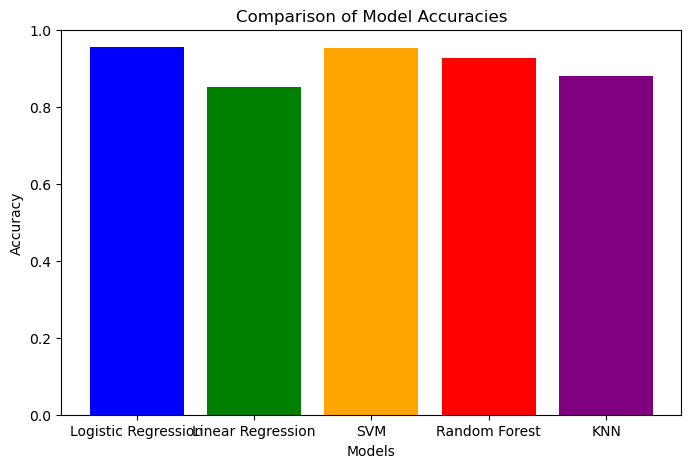

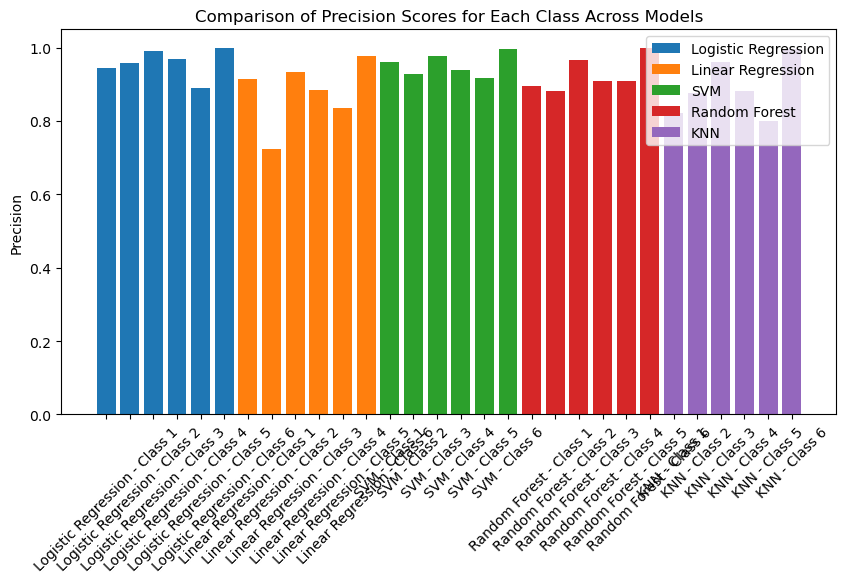

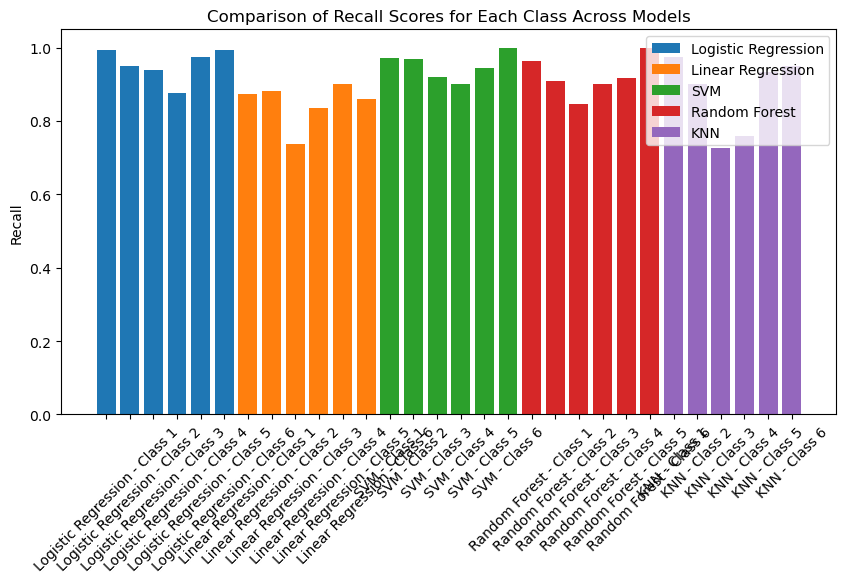

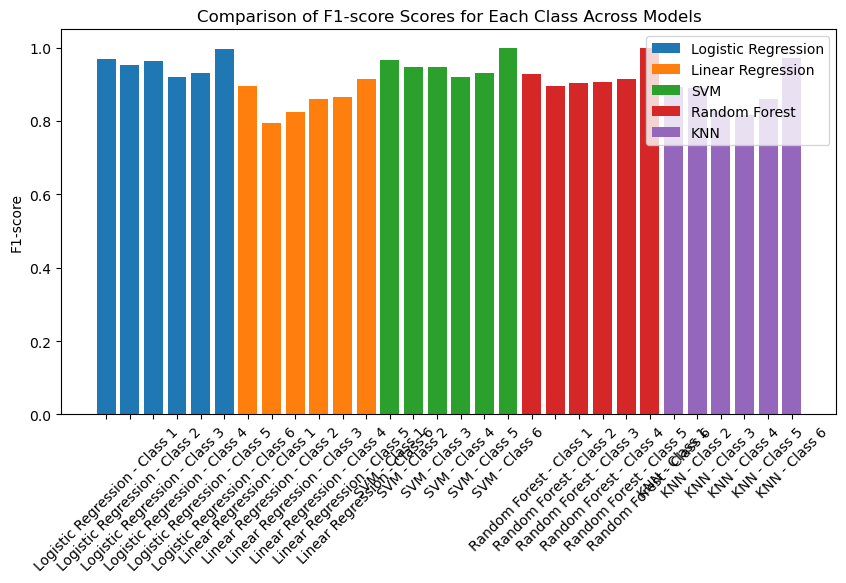

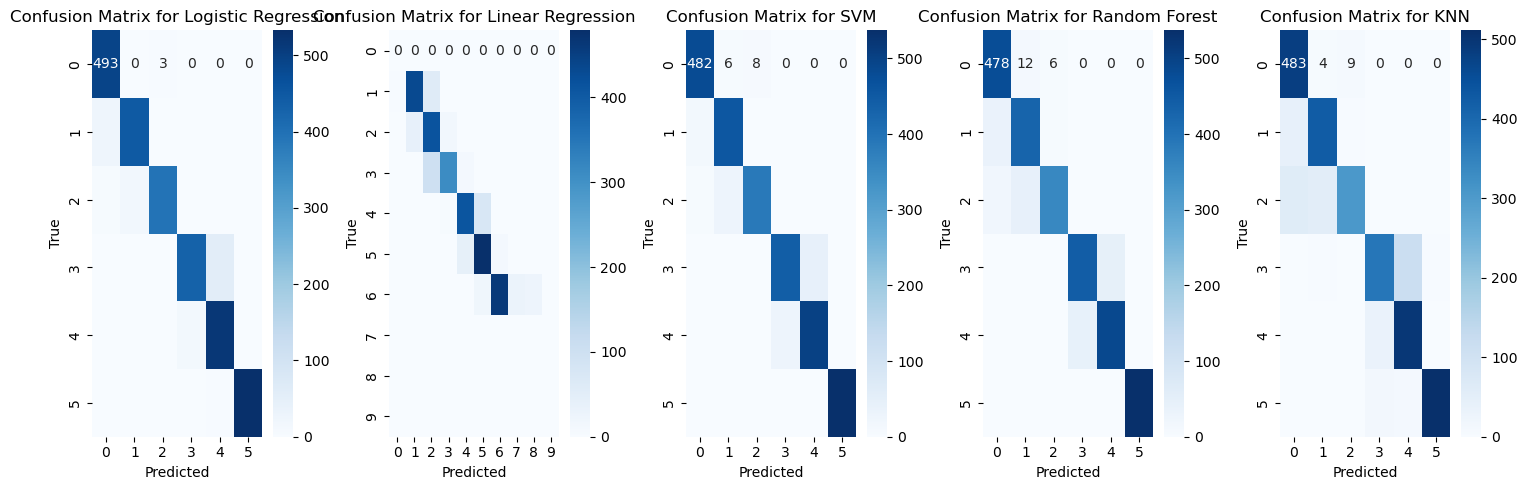

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
def load_data():
    # Load the training data
    X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
    y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)

    # Load the test data
    X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
    y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)
    
    return X_train, y_train, X_test, y_test

# Preprocess the data
def preprocess_data(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

# Train and evaluate Logistic Regression
def logistic_regression(X_train, y_train, X_test, y_test):
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, y_train.values.ravel())
    y_pred = lr_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    print("Logistic Regression Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    
    return accuracy, report, cm

# Train and evaluate Linear Regression (for comparison purposes)
def linear_regression(X_train, y_train, X_test, y_test):
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = np.round(lr_model.predict(X_test)).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    print("\nLinear Regression Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    
    return accuracy, report, cm

# Train and evaluate SVM
def svm_classifier(X_train, y_train, X_test, y_test):
    svm_model = SVC(kernel='rbf')
    svm_model.fit(X_train, y_train.values.ravel())
    y_pred = svm_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    print("\nSVM Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    
    return accuracy, report, cm

# Train and evaluate Random Forest
def random_forest_classifier(X_train, y_train, X_test, y_test):
    rf_model = RandomForestClassifier(n_estimators=100)
    rf_model.fit(X_train, y_train.values.ravel())
    y_pred = rf_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    print("\nRandom Forest Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    
    return accuracy, report, cm

# Train and evaluate K-Nearest Neighbors (KNN)
def knn_classifier(X_train, y_train, X_test, y_test):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train.values.ravel())
    y_pred = knn_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    print("\nK-Nearest Neighbors (KNN) Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    
    return accuracy, report, cm

# Function to plot the bar graph for accuracy
def plot_accuracy(accuracies):
    models = list(accuracies.keys())
    values = list(accuracies.values())

    plt.figure(figsize=(8, 5))
    plt.bar(models, values, color=['blue', 'green', 'orange', 'red', 'purple'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Model Accuracies')
    plt.ylim([0, 1])
    plt.show()

# Function to plot Precision, Recall, and F1-Score
def plot_precision_recall_f1(reports, metric):
    metrics = ['precision', 'recall', 'f1-score']
    if metric not in metrics:
        raise ValueError(f"Invalid metric: {metric}. Choose from {metrics}.")
    
    plt.figure(figsize=(10, 5))
    for model, report in reports.items():
        scores = [report[str(i)][metric] for i in range(1, 7)]
        plt.bar([f'{model} - Class {i}' for i in range(1, 7)], scores, label=model)
    
    plt.ylabel(metric.capitalize())
    plt.title(f'Comparison of {metric.capitalize()} Scores for Each Class Across Models')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Function to plot Confusion Matrices
def plot_confusion_matrix(cms):
    plt.figure(figsize=(15, 5))
    for i, (model, cm) in enumerate(cms.items()):
        plt.subplot(1, 5, i + 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {model}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
    plt.tight_layout()
    plt.show()

# Main function
if __name__ == "__main__":
    # Load data
    X_train, y_train, X_test, y_test = load_data()
    
    # Preprocess data
    X_train, X_test = preprocess_data(X_train, X_test)
    
    # Store accuracies, reports, and confusion matrices
    accuracies = {}
    reports = {}
    cms = {}

    # Logistic Regression
    accuracies['Logistic Regression'], reports['Logistic Regression'], cms['Logistic Regression'] = logistic_regression(X_train, y_train, X_test, y_test)
    
    # Linear Regression
    accuracies['Linear Regression'], reports['Linear Regression'], cms['Linear Regression'] = linear_regression(X_train, y_train, X_test, y_test)
    
    # SVM
    accuracies['SVM'], reports['SVM'], cms['SVM'] = svm_classifier(X_train, y_train, X_test, y_test)
    
    # Random Forest
    accuracies['Random Forest'], reports['Random Forest'], cms['Random Forest'] = random_forest_classifier(X_train, y_train, X_test, y_test)
    
    # KNN
    accuracies['KNN'], reports['KNN'], cms['KNN'] = knn_classifier(X_train, y_train, X_test, y_test)
    
    # Plot the results
    plot_accuracy(accuracies)
    plot_precision_recall_f1(reports, 'precision')
    plot_precision_recall_f1(reports, 'recall')
    plot_precision_recall_f1(reports, 'f1-score')
    plot_confusion_matrix(cms)
